In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# reshaping X data: (n, 28, 28) => (n, 28, 28, 1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [ ]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train) #training data uses classes as numbers, to_categorical will transform those numbers in proper vectors for using with models.
y_test = to_categorical(y_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
def basic_cnn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [ ]:
model = basic_cnn()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 50)        500       
                                                                 
 activation (Activation)     (None, 28, 28, 50)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 50)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9800)              0         
                                                                 
 dense (Dense)               (None, 50)                490050    
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                        

In [ ]:
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.2, epochs = 10, verbose = 1)

Epoch 1/10
188/188 [==============================] - 30s 158ms/step - loss: 2.2586 - accuracy: 0.6634 - val_loss: 0.6391 - val_accuracy: 0.8403
Epoch 2/10
188/188 [==============================] - 28s 148ms/step - loss: 0.4964 - accuracy: 0.8828 - val_loss: 0.3403 - val_accuracy: 0.8790
Epoch 3/10
188/188 [==============================] - 28s 146ms/step - loss: 0.2314 - accuracy: 0.9349 - val_loss: 0.1707 - val_accuracy: 0.9552
Epoch 4/10
188/188 [==============================] - 28s 150ms/step - loss: 0.1191 - accuracy: 0.9667 - val_loss: 0.1352 - val_accuracy: 0.9654
Epoch 5/10
188/188 [==============================] - 28s 148ms/step - loss: 0.0850 - accuracy: 0.9752 - val_loss: 0.1303 - val_accuracy: 0.9645
Epoch 6/10
188/188 [==============================] - 27s 146ms/step - loss: 0.0667 - accuracy: 0.9806 - val_loss: 0.1229 - val_accuracy: 0.9692
Epoch 7/10
188/188 [==============================] - 27s 145ms/step - loss: 0.0517 - accuracy: 0.9844 - val_loss: 0.1191 - val_ac

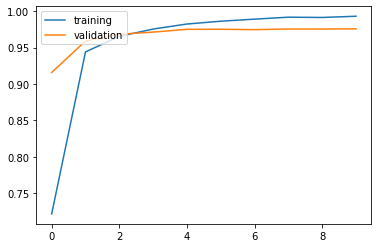

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.1105 - accuracy: 0.9732


In [ ]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9732000231742859


In [ ]:
def deep_cnn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model   

In [ ]:
model = deep_cnn()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 50)        500       
                                                                 
 activation_1 (Activation)   (None, 28, 28, 50)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 50)        22550     
                                                                 
 activation_2 (Activation)   (None, 28, 28, 50)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 50)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 50)        22550     
                                                      

In [ ]:

history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 10, verbose = 1)

Epoch 1/10
960/960 [==============================] - 309s 321ms/step - loss: 0.1805 - accuracy: 0.9439 - val_loss: 0.0737 - val_accuracy: 0.9788
Epoch 2/10
960/960 [==============================] - 304s 317ms/step - loss: 0.0546 - accuracy: 0.9829 - val_loss: 0.0463 - val_accuracy: 0.9874
Epoch 3/10
960/960 [==============================] - 303s 316ms/step - loss: 0.0400 - accuracy: 0.9877 - val_loss: 0.0414 - val_accuracy: 0.9888
Epoch 4/10
960/960 [==============================] - 307s 320ms/step - loss: 0.0367 - accuracy: 0.9883 - val_loss: 0.0376 - val_accuracy: 0.9872
Epoch 5/10
960/960 [==============================] - 305s 318ms/step - loss: 0.0310 - accuracy: 0.9907 - val_loss: 0.0532 - val_accuracy: 0.9856
Epoch 6/10
960/960 [==============================] - 306s 319ms/step - loss: 0.0248 - accuracy: 0.9920 - val_loss: 0.0470 - val_accuracy: 0.9885
Epoch 7/10
960/960 [==============================] - 306s 318ms/step - loss: 0.0260 - accuracy: 0.9919 - val_loss: 0.0488 -

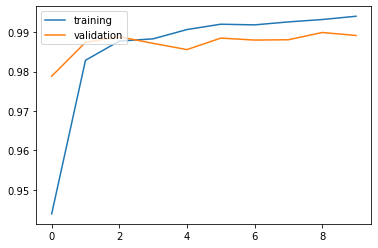

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)

In [ ]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9883999824523926
